# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1714089186896.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,04/24/2024,5071.63,5084.86,5089.48,5047.02
1,04/23/2024,5070.55,5028.85,5076.12,5027.96
2,04/22/2024,5010.60,4987.33,5038.84,4969.40
3,04/19/2024,4967.23,5005.44,5019.02,4953.56
4,04/18/2024,5011.12,5031.52,5056.66,5001.89
...,...,...,...,...,...
2526,05/01/2014,1883.68,1884.39,1888.59,1878.04
2527,04/30/2014,1883.95,1877.10,1885.20,1872.69
2528,04/29/2014,1878.33,1870.78,1880.60,1870.78
2529,04/28/2014,1869.43,1865.00,1877.01,1850.61


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2531.000000,2531.000000,2531.000000,2531.000000
mean,3099.370182,3087.561023,3104.109573,3069.785658
std,943.306555,967.533873,973.452214,961.572786
min,1829.080000,0.000000,0.000000,0.000000
25%,2170.905000,2170.065000,2175.465000,2162.595000
50%,2850.400000,2848.630000,2865.010000,2830.940000
75%,3986.265000,3986.075000,4015.380000,3953.890000
max,5254.350000,5257.970000,5264.850000,5245.820000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2517.000000,2517.000000,2517.000000,2517.000000
mean,3105.262491,3104.734585,3121.375181,3086.860350
std,942.590406,942.332318,948.139346,936.503626
min,1829.080000,1833.400000,1847.000000,1810.100000
25%,2177.180000,2177.490000,2183.080000,2170.410000
50%,2856.980000,2856.060000,2869.400000,2836.400000
75%,3991.050000,3992.780000,4018.050000,3956.400000
max,5254.350000,5257.970000,5264.850000,5245.820000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2530
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2517 non-null   object 
 1   Close/Last  2517 non-null   float64
 2   Open        2517 non-null   float64
 3   High        2517 non-null   float64
 4   Low         2517 non-null   float64
dtypes: float64(4), object(1)
memory usage: 118.0+ KB


In [5]:
df.shape

(2517, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

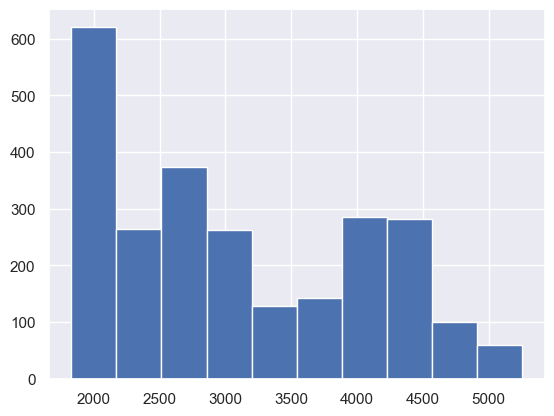

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

5071.63

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3105.2624910607933

In [10]:
close_sd = df['Close/Last'].std()
close_sd

942.5904061246525

In [11]:
sigma1 = close_mean + close_sd
sigma1

4047.8528971854457

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4990.443303310099

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5461.738506372425

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2517 entries, 0 to 2530
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2014-04-25 to 2024-04-24')

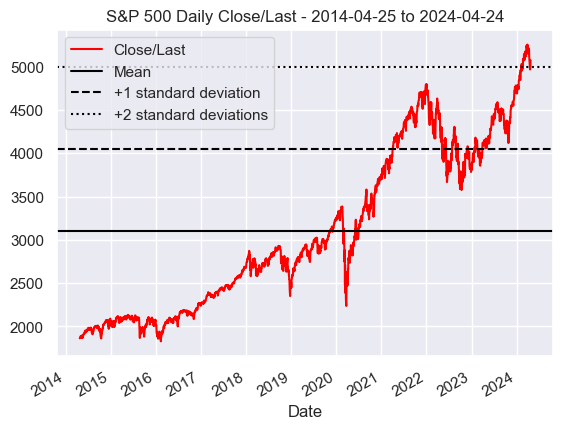

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2014-04-25 to 2024-04-24')

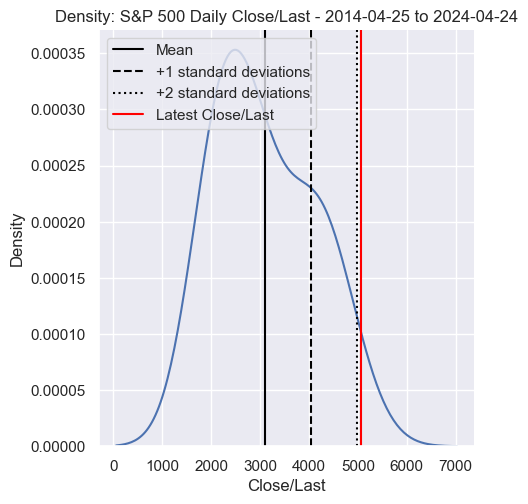

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

2.086131469366096

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results